In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
train = pd.read_csv('train_1.csv').fillna(0)

In [4]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

In [5]:
train['lang'] = train.Page.map(get_language)

In [6]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [7]:
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09
74690  Special:Search_en.wikipedia.org_mobile-web_all...  2.921628e+08
39172  Special:Book_en.wikipedia.org_all-access_all-a...  1.339931e+08
10399   Special:Book_en.wikipedia.org_desktop_all-agents  1.332859e+08
33644       Main_Page_en.wikipedia.org_all-access_spider  1.290204e+08
34257  Special:Search_en.wikipedia.org_all-access_spider  1.243102e+08



ja
                                                     Page        total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415

In [20]:
train.shape

(145063, 552)

In [9]:
from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


/Users/401384/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


en


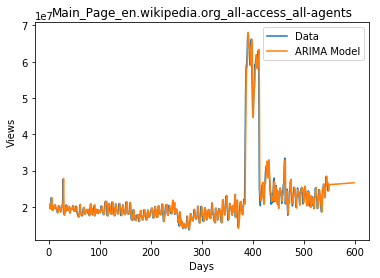

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

cols = train.columns[1:-1]
key='en'
print(key)
data = np.array(train.loc[top_pages[key],cols],'f')
result = None
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    try:
        arima = ARIMA(data,[2,1,4])
        result = arima.fit(disp=False)
    except:
        try:
            arima = ARIMA(data,[2,1,2])
            result = arima.fit(disp=False)
        except:
            print(train.loc[top_pages[key],'Page'])
            print('\tARIMA failed')
#print(result.params)
pred = result.predict(2,599,typ='levels')
x = [i for i in range(600)]
i=0

plt.plot(x[2:len(data)],data[2:] ,label='Data')
plt.plot(x[2:],pred,label='ARIMA Model')
plt.title(train.loc[top_pages[key],'Page'])
plt.xlabel('Days')
plt.ylabel('Views')
plt.legend()
plt.show()

In [15]:
key='en'
print(key)
data = np.array(train.loc[top_pages[key],cols],'f')
result = None

en


In [17]:
arima = ARIMA(data,[2,1,2])
result = arima.fit(disp=False)

In [19]:
pred = result.predict(2,599,typ='levels')

In [34]:
result

In [21]:
data.shape

(550,)